In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, Input
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [38]:
img_width, img_height = 150,150 
train_data_dir = "D:/Train"
validation_data_dir="D:/Test"
epochs = 10
batch_size= 10

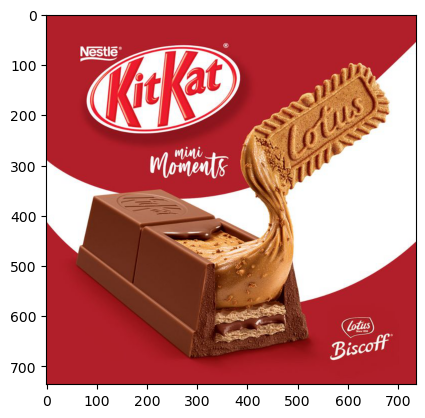

In [6]:
img=mpimg.imread('D:/Train/Ads/3a7dec8d-e5f0-418a-b3c0-210b050fce0d.jpg')
imgplot = plt.imshow(img)
plt.show()

In [40]:
train_datagen=ImageDataGenerator( rescale=1. /255,shear_range =0.2,
                                  zoom_range=0.2,horizontal_flip =True)
test_datagen=ImageDataGenerator (rescale=1. /255)

train_generator =train_datagen.flow_from_directory("D:/Train",target_size =(img_width,img_height),
                                                 batch_size=batch_size,class_mode='binary',classes=['Ads','NonAds'])

validation_generator =test_datagen.flow_from_directory("D:/Test",target_size =(img_width,img_height),
                                                       batch_size=batch_size,class_mode='binary')

Found 382 images belonging to 2 classes.
Found 61 images belonging to 2 classes.


In [10]:
model = Sequential()
input_shape = (150,150,3)
model.add(Input(shape = input_shape))
model.add(Conv2D(16,(3,3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu')) #relu=max(0,x)
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
training = model.fit(train_generator,
                   epochs=epochs,
                   validation_data=validation_generator)

Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 13s 287ms/step - accuracy: 0.9739 - loss: 0.0660 - val_accuracy: 0.8689 - val_loss: 0.3614
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 267ms/step - accuracy: 0.9558 - loss: 0.1491 - val_accuracy: 0.8852 - val_loss: 0.2103
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 268ms/step - accuracy: 0.9836 - loss: 0.0541 - val_accuracy: 0.8525 - val_loss: 0.2556
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 267ms/step - accuracy: 0.9830 - loss: 0.0842 - val_accuracy: 0.7049 - val_loss: 0.6444
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 263ms/step - accuracy: 0.9403 - loss: 0.1097 - val_accuracy: 0.9180 - val_loss: 0.1983
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 267ms/step - accuracy: 0.9967 - loss: 0.0300 - val_accuracy: 0.9016 - val_loss: 0.2097
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 276ms/step - accuracy: 0.9755 - loss: 0.0596 - val_accuracy: 0.6557 - val_loss: 1.0456
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 13s 281ms/step - accuracy: 0.9790 - loss: 0.0760 - val_accu

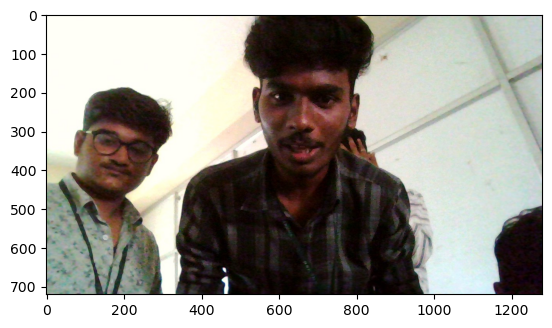

In [41]:
s="C:/Users/Hari/OneDrive/Pictures/Camera Roll/WIN_20231107_11_04_47_Pro.jpg"
im=mpimg.imread(s)
imgplot = plt.imshow(im)
plt.show()

In [42]:
import tensorflow.keras.utils as tf
import numpy as np
pred=tf.load_img(s,target_size=(img_width,img_height))
pred_m=tf.img_to_array(pred)
pred_m=pred_m / 255
pred_m=np.expand_dims(pred_m,axis=0)
res=model.predict(pred_m)
print(res)
print("Nonad" if np.round(res,1)>=0.5 else "Ad")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[[0.9912992]]
Nonad


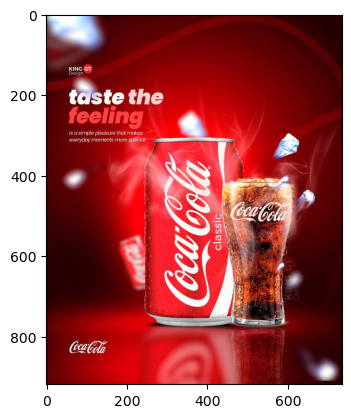

In [43]:
t="C:/Users/Hari/OneDrive/Desktop/test.jpg"
im=mpimg.imread(t)
imgplot = plt.imshow(im)
plt.show()

In [44]:
pred=tf.load_img(t,target_size=(img_width,img_height))
pred_m=tf.img_to_array(pred)
pred_m=pred_m / 255
pred_m=np.expand_dims(pred_m,axis=0)
res=model.predict(pred_m)
print(res)
print("Nonad" if np.round(res,1)>=0.5 else "Ad")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[2.4569795e-09]]
Ad


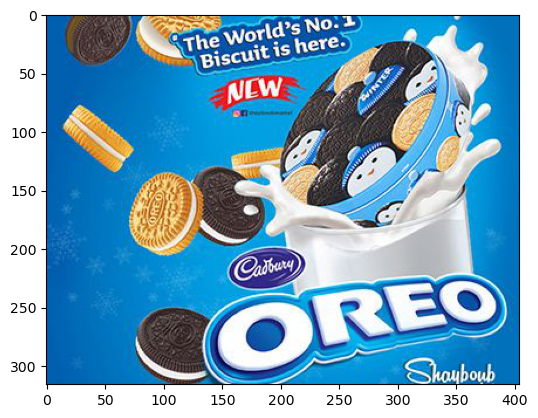

In [45]:
t1="C:/Users/Hari/OneDrive/Desktop/test1.jpg"
im=mpimg.imread(t1)
imgplot = plt.imshow(im)
plt.show()

In [46]:
pred=tf.load_img(t1,target_size=(img_width,img_height))
pred_m=tf.img_to_array(pred)
pred_m=pred_m / 255
pred_m=np.expand_dims(pred_m,axis=0)
res=model.predict(pred_m)
print(res)
print("Nonad" if np.round(res,1)>=0.5 else "Ad")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[0.02809498]]
Ad


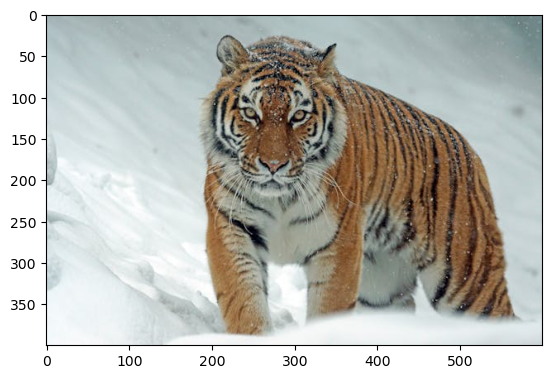

In [47]:
s1="C:/Users/Hari/OneDrive/Desktop/pexels-photo-302304.jpg"
im=mpimg.imread(s1)
imgplot = plt.imshow(im)
plt.show()

In [48]:
pred=tf.load_img(s1,target_size=(img_width,img_height))
pred_m=tf.img_to_array(pred)
pred_m=pred_m / 255
pred_m=np.expand_dims(pred_m,axis=0)
res=model.predict(pred_m)
print(res)
print("Nonad" if np.round(res,1)>=0.5 else "Ad")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0.9824621]]
Nonad
